<a href="https://colab.research.google.com/github/muhammedbalogun/Hamoye_internship_assignments/blob/master/005_tag_along_code_stageE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis and Forecast

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# preliminary assessment function

def assess_data(file, encoding='utf-8'):
    
    # read file
    df = pd.read_csv(file, encoding=encoding)
    
    # check header
    print("\n The First Five Observations in DataFrame \n")
    display(df.head())
    
    # check tail
    print("\n The Last Five Observations in DataFrame \n")
    display(df.tail())
    
    # check shape of df
    print("\n The Shape of DataFrame")
    print(df.shape)
    
    # check info of df
    print("\n Basic Information of DataFrame \n")
    display(df.info())
    
    # check number of unique values in df
    print("\n Number of Unique Values in DataFrame \n")
    print(df.nunique())
    
    # check number of missing values in df
    print("\n Number of Missing Values in DataFrame \n")
    print(df.isnull().sum())
    
    # check number duplicates in df
    print("\n Number of Duplicates in DataFrame")
    print("Number of duplicates: ", df.duplicated().sum())
    
    return df

In [3]:
url = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'

# load data and assess data
df = assess_data(url)


 The First Five Observations in DataFrame 



,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030



 The Last Five Observations in DataFrame 



,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955



 The Shape of DataFrame
(92016, 5)

 Basic Information of DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


None


 Number of Unique Values in DataFrame 

FullDate     92016
Tmax           328
SysLoad      91933
GasPrice      2128
ElecPrice    31855
dtype: int64

 Number of Missing Values in DataFrame 

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

 Number of Duplicates in DataFrame
Number of duplicates:  0


In [4]:
# change the FullDate data type from spring to datatime
df['FullDate'] = pd.to_datetime(df['FullDate'])

# confirm changes
df.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

In [5]:
# subset df for analysis
df_sub = df[['FullDate', 'ElecPrice']]
df_sub.head()

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [6]:
# rename columns
df_sub = df_sub.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_sub.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [7]:
# set dt as index
df_sub.set_index('ds', inplace=True)
df_sub.head()

,y
ds,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030


In [8]:
# resample data to daily
df_daily = df_sub.resample('D').sum()
df_daily.head()

,y
ds,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


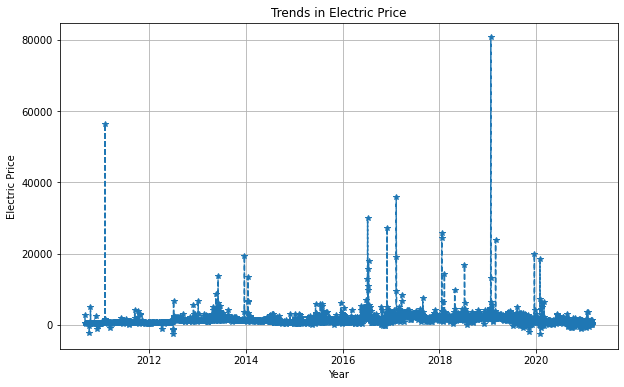

In [9]:
# visualize relationship
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.y, '--', marker='*')
plt.grid()
#plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Electric Price')
plt.title("Trends in Electric Price");

### Install required library for the time series analysis

In [10]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Building Model

### Split Data

In [12]:
df_daily = df_daily.reset_index()
df_daily.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [13]:
X_train = df_daily[:2757]
X_test = df_daily[2757:]

In [14]:
print(X_train.shape)
print(X_test.shape)

(2757, 2)
(1077, 2)


### Univariant Model

In [15]:
from fbprophet import Prophet
model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1340.386283,3331.313779,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1214.897035,3531.460145,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1524.467034,3288.885808,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1843.476229,3000.118969,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-2029.719756,2604.828283,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,996.028134,-1340.386283,3331.313779,851.777631,851.777631,851.777631
1,2010-09-02,1076.181083,-1214.897035,3531.460145,851.727173,851.727173,851.727173
2,2010-09-03,851.092206,-1524.467034,3288.885808,851.676716,851.676716,851.676716
3,2010-09-04,510.753732,-1843.476229,3000.118969,851.626258,851.626258,851.626258
4,2010-09-05,420.690845,-2029.719756,2604.828283,851.575800,851.575800,851.575800
...,...,...,...,...,...,...,...
2764,2018-10-31,2648.091030,162.367439,5044.998658,2875.492451,2718.341248,3018.730875
2765,2018-11-30,2956.350030,360.449336,5185.433368,2899.989526,2712.390233,3072.900683
2766,2018-12-31,2770.874120,423.901196,5043.660249,2925.303170,2705.073538,3127.019715
2767,2019-01-31,3819.898434,1158.824411,6030.359081,2950.616815,2695.545051,3194.304649


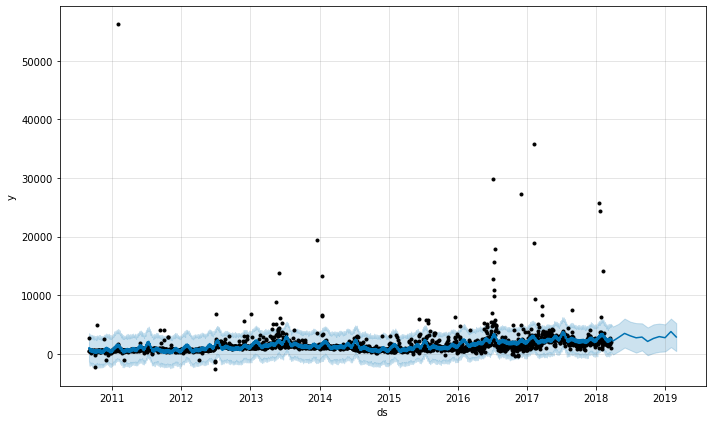

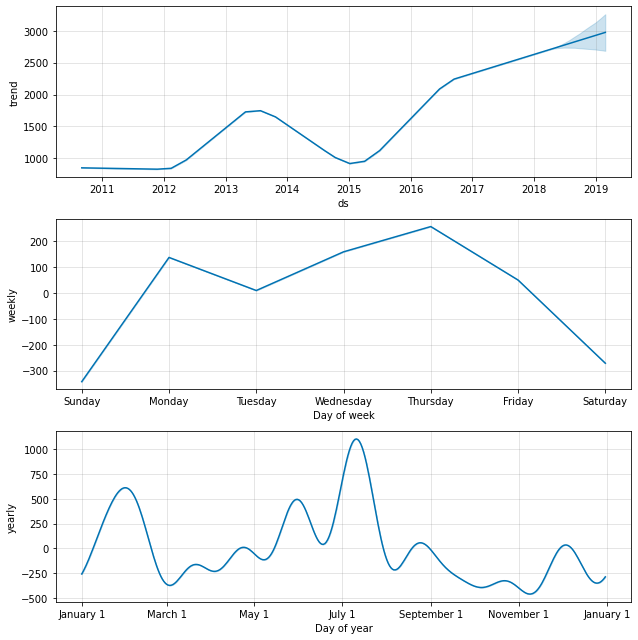

In [18]:
model.plot(forecast)
model.plot_components(forecast)
plt.show()

In [36]:
prediction = model.predict(X_test)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,419.017077,4868.319399,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,297.707861,5159.606215,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,394.589243,5238.431759,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,309.677365,4899.296876,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-30.374076,4717.237495,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


### Model Performance

In [39]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [41]:
mse = mean_squared_error(X_test, prediction)

TypeError: ignored

In [40]:
mape = mean_absolute_percentage_error(X_test, prediction)

TypeError: ignored

### Multivariant Model

In [19]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [20]:
df.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

In [21]:
# set FullDate as index
df.set_index('FullDate', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [22]:
# resample data to daily
df_daily_full = df.resample('D').sum()
df_daily_full.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [23]:
# reset index
df_daily_full.reset_index(inplace=True)
df_daily_full.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [24]:
# rearrange variable
df_daily_arr = df_daily_full[['FullDate', 'SysLoad', 'Tmax', 'GasPrice', 'ElecPrice']]
df_daily_arr.head()

,FullDate,SysLoad,Tmax,GasPrice,ElecPrice
0,2010-09-01,41565.380,379.2,88.56,2751.700
1,2010-09-02,38898.990,369.6,88.56,570.810
2,2010-09-03,41665.760,439.2,106.80,504.975
3,2010-09-04,35638.085,328.8,81.36,502.275
4,2010-09-05,35611.410,357.6,106.80,500.555


In [25]:
# rename columns
df_daily_arr = df_daily_arr.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_daily_arr.head()

,ds,SysLoad,Tmax,GasPrice,y
0,2010-09-01,41565.380,379.2,88.56,2751.700
1,2010-09-02,38898.990,369.6,88.56,570.810
2,2010-09-03,41665.760,439.2,106.80,504.975
3,2010-09-04,35638.085,328.8,81.36,502.275
4,2010-09-05,35611.410,357.6,106.80,500.555


### Split Data

In [27]:
X_train_full = df_daily_arr[:2757]
X_test_full = df_daily_arr[2757:]
print(X_train_full.shape)
print(X_test_full.shape)

(2757, 5)
(1077, 5)


### Model Multivariant

In [28]:
model_full = Prophet()
model_full.fit(X_train_full)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
#predict for the next 12 months
future_full = model_full.make_future_dataframe(periods=12, freq='M')
forecast_full = model_full.predict(future_full)
forecast_full.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1332.354867,3219.045096,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1203.189823,3420.767491,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1413.964712,3203.906091,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1896.177314,2785.848999,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-1978.099274,2941.333624,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845


In [30]:
forecast_full[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,996.028134,-1332.354867,3219.045096,851.777631,851.777631,851.777631
1,2010-09-02,1076.181083,-1203.189823,3420.767491,851.727173,851.727173,851.727173
2,2010-09-03,851.092206,-1413.964712,3203.906091,851.676716,851.676716,851.676716
3,2010-09-04,510.753732,-1896.177314,2785.848999,851.626258,851.626258,851.626258
4,2010-09-05,420.690845,-1978.099274,2941.333624,851.575800,851.575800,851.575800
...,...,...,...,...,...,...,...
2764,2018-10-31,2648.091030,292.628022,5029.855386,2875.492451,2747.125107,3010.106881
2765,2018-11-30,2956.350030,578.347482,5181.965919,2899.989526,2734.205268,3067.312363
2766,2018-12-31,2770.874120,585.599543,5098.772065,2925.303170,2721.251529,3128.919490
2767,2019-01-31,3819.898434,1373.301739,6400.646226,2950.616815,2707.255614,3197.315180


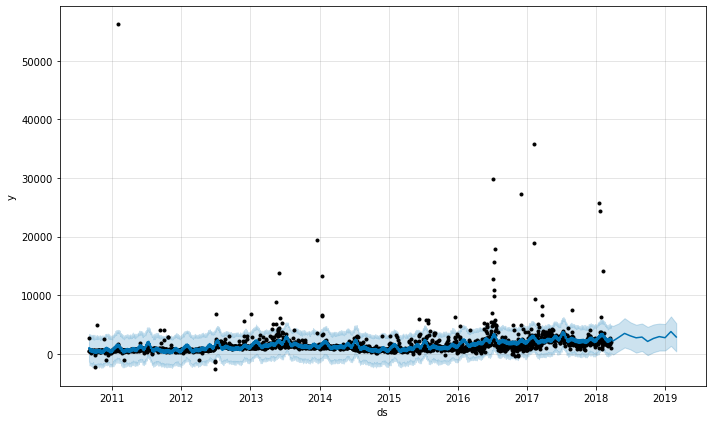

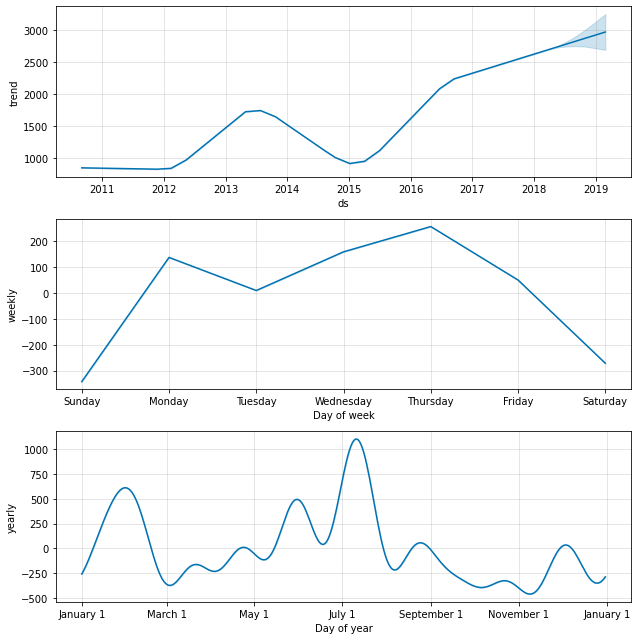

In [31]:
model_full.plot(forecast_full)
model_full.plot_components(forecast_full)
plt.show()